In [ ]:
# Import required packages
from pathlib import Path

import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fft import fft, fftfreq
import numpy as np 

def create_visualisation(x_array, y_array, title, x_title, y_title):
    """Create a visualisation."""
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(
        x=x_array,
        y=y_array,
    )
    # titles and axes contructing
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    fig.suptitle(t=vtitle, x=0.01, ha="left", fontsize="xx-large")

    plt.show()

    return fig


def get_sound_info(filename):
    """Locate sound file and clean data."""
    sound_information = {}

    # Initial look into the stag sound
    stag_sound_filename = Path.cwd() / 'Red_stag_roar-Juan_Carlos_-2004708707.wav'
    sound_information["rate"], sound_information["data"] = wav.read(stag_sound_filename)
    sound_information["duration"] = 11

    # clean data
    sound_information["data_1d"] = np.delete(sound_information["data"], 0, 1)
    sound_information["nonzerodata"] = sound_information["data_1d"][ sound_information["data_1d"] != 0]

    # required variables
    sound_information["num_of_nonzero_data_points"] = len(sound_information["nonzerodata"])
    sound_information["frequencies"] = np.arange(20,20000)

    return sound_information


def calculate_frequency_average(datapoints, frequency, n_arr, dp):
    """Co,pute fourier transformation"""
    # complex number calculation
    inside_trig_component = (-2 * np.pi * frequency * n_arr / dp )
    real_compeonemt = (datapoints * np.cos(inside_trig_component) ).mean()
    imaginary_component =  (datapoints * np.sin(inside_trig_component) ).mean()

    # combining real and imaginry parts
    complex_output = complex(real_compeonemt, imaginary_component) 
    return np.abs(complex_output)


def run_fourier_transform(sound_info):
    """Calculatre the fourier transform."""
    frequencies_transformed = []
    for f in get_sound_info["frequencies"]:
        transformed_output = calculate_frequency_average(
            datapoints=sound_info["nonzerodata"],
            frequency=f,
            n_arr=np.arange(len(sound_info["nonzerodata"])),
            dp=len(sound_info["nonzerodata"]),
        )
        frequencies_transformed.append(transformed_output)

        return frequencies_transformed



In [49]:
sound_information = {}

# Initial look into the stag sound
stag_sound_filename = Path.cwd() / 'Red_stag_roar-Juan_Carlos_-2004708707.wav'
sound_information["rate"], sound_information["data"] = wav.read(stag_sound_filename)
sound_information["duration"] = 11

# clean data
sound_information["data_1d"] = np.delete(sound_information["data"], 0, 1)
sound_information["nonzerodata"] = sound_information["data_1d"][ sound_information["data_1d"] != 0]

# required variables
sound_information["num_of_nonzero_data_points"] = len(sound_information["nonzerodata"])
sound_information["frequencies"] = np.arange(20000)


def calculate_frequency_average(datapoints, frequency, n_arr, dp):
    """Compute fourier transformation"""
    # complex number calculation
    inside_trig_component = (-2 * np.pi * frequency * n_arr / dp )
    real_component = np.mean(datapoints * np.cos(inside_trig_component) )
    imaginary_component = np.mean(datapoints * -np.sin(inside_trig_component) )

    # combining real and imaginary parts
    complex_output = complex(real_component, imaginary_component) 
    return np.abs(complex_output)


frequencies_transformed = []
for f in sound_information["frequencies"]:
    transformed_output = calculate_frequency_average(
        datapoints=sound_information["nonzerodata"],
        frequency=f,
        n_arr=np.arange(len(sound_information["nonzerodata"])),
        dp=len(sound_information["nonzerodata"]),
    )
    frequencies_transformed.append(transformed_output)



/tmp/ipykernel_26834/2384277194.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sound_information["rate"], sound_information["data"] = wav.read(stag_sound_filename)


In [51]:
print(f"The max term in the frequency power is {np.max(frequencies_transformed)} and the min is {np.min(frequencies_transformed)}")

The max term in the frequency power is 65.58619845884975 and the min is 0.007751440491984193


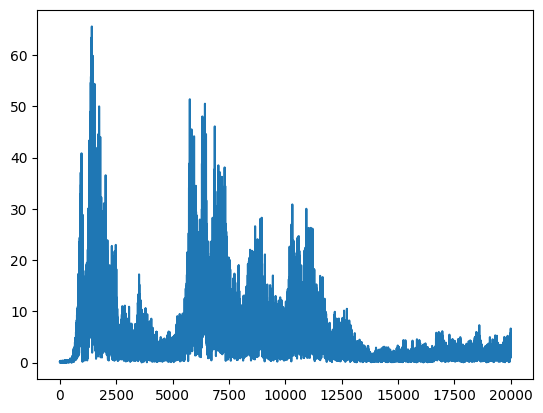

In [52]:
plt.plot(frequencies_transformed)
plt.show()

/home/heather/.pyenv/versions/eulers_stag_fourier_transform/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


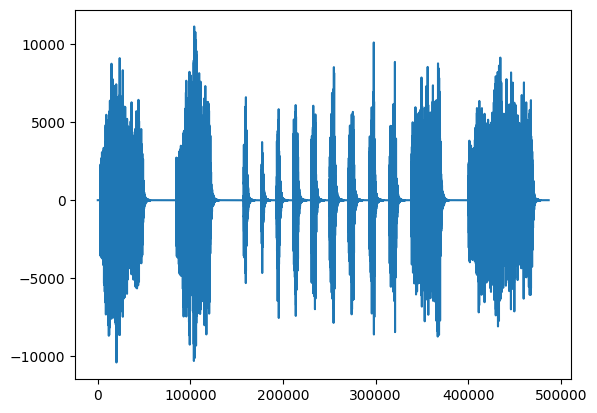

In [42]:
fft_out = fft(sound_information["data_1d"])
fft_frquency = fftfreq(sound_information["rate"], d=sound_information["duration"])

plt.plot(fft_out)
plt.show()